## Import Libraries

In [101]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

## Data

In [102]:
df = pd.read_csv('Datasets/clustering.csv')

In [103]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


In [104]:
X = df[["LoanAmount","ApplicantIncome"]]

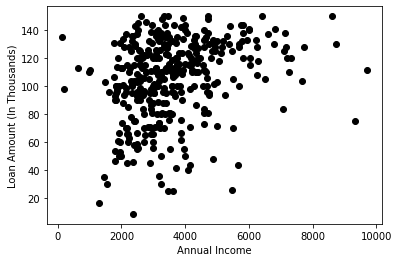

In [105]:
plt.scatter(X["ApplicantIncome"], X["LoanAmount"], c='black')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

## Kmeans

### <b>Step One: </b> Choose Random K Numbers

In [106]:
k=3

# Pick 3 Random Centroids from Data
centroids = (X.sample(n=k))


### <b>Step Two: </b> Plot Centroids and Points

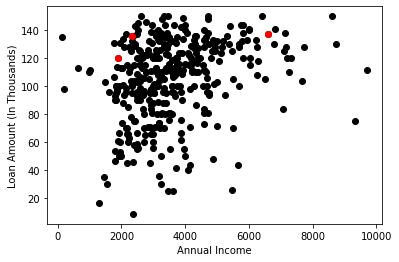

In [107]:
plt.scatter(X["ApplicantIncome"], X["LoanAmount"], c="black")
plt.scatter(centroids["ApplicantIncome"], centroids["LoanAmount"], c="red")
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

### <b>Step Three: </b> Assign Each Point to the closest Centroid

In [108]:
def getDistances(row, centroid):
    return np.sqrt(np.sum((row - centroid)**2)) 

In [109]:
pos_centroid = []

for index_r, row in X.iterrows():
    distances = []
    for index_c, centroid in centroids.iterrows():
        distances.append(getDistances(row, centroid))

    pos_centroid.append(distances.index(min(distances)) + 1)


In [110]:
X["Cluster"] = pos_centroid

/tmp/ipykernel_48507/2955013247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"] = pos_centroid


### Visualize Data in Clusters

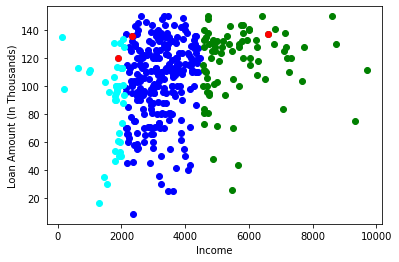

In [111]:
color=['blue','green','cyan']
for k in range(k):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(centroids["ApplicantIncome"],centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [112]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [114]:
X_new = X[["LoanAmount", "ApplicantIncome"]]
scaler = StandardScaler()
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X_new)

In [115]:
data_scaled.shape

(381, 2)

In [116]:
# statistics of scaled data
data_scaled = pd.DataFrame(data_scaled)

data_scaled.columns = ['LoanAmount','ApplicantIncome']

In [117]:
kmeans = KMeans(n_clusters=3, init='k-means++')


kmeans.fit(data_scaled)

KMeans(n_clusters=3)

In [118]:
kmeans.inertia_

286.558351109093

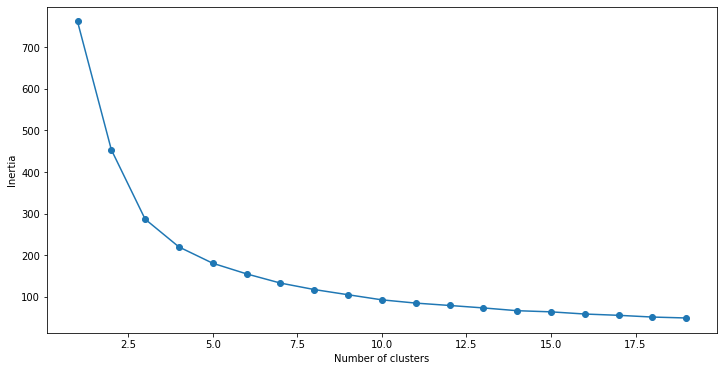

In [119]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':np.arange(1,20, 1), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [130]:
kmeans = KMeans( n_clusters = 7, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [131]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

2    83
1    81
5    75
6    57
3    48
0    19
4    18
Name: cluster, dtype: int64

In [132]:
frame.head()

,LoanAmount,ApplicantIncome,cluster
0,0.812575,0.707469,3
1,-1.376596,-0.408932,6
2,0.530102,-0.703019,5
3,1.271595,1.706799,3
4,-0.352629,-0.879330,1


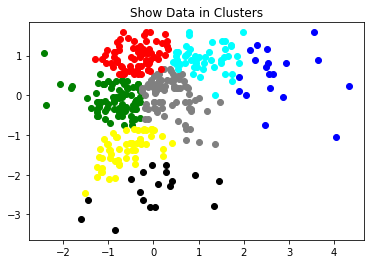

In [136]:
color=['blue','green','grey','cyan', 'black','red','yellow']
for k in range(7):
    data=frame[frame["cluster"]==k]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.title("Show Data in Clusters")
plt.show()